In [2]:
import matplotlib.pyplot as plt
import pretty_midi
import librosa.display
import numpy as np
import pandas as pd
import os
import pickle

In [3]:
data_path = '/home/hice1/sgoel83/scratch/Maestro/maestro-v3.0.0/'
test_midi_path = '/home/hice1/sgoel83/scratch/Maestro/maestro-v3.0.0/2018/MIDI-Unprocessed_Chamber2_MID--AUDIO_09_R3_2018_wav--1.midi'

# Single MIDI file test

In [3]:
test_midi_data = pretty_midi.PrettyMIDI(test_midi_path)
test_midi_piano_roll = test_midi_data.get_piano_roll()
print(type(test_midi_piano_roll))
print(test_midi_piano_roll.shape)
# df_describe = pd.DataFrame(midi_piano_roll)
# df_describe.describe()

<class 'numpy.ndarray'>
(128, 58224)


/scratch/907741/ipykernel_1936994/4055584702.py:3: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(test_midi_data.get_piano_roll(fs)[start_pitch:end_pitch],


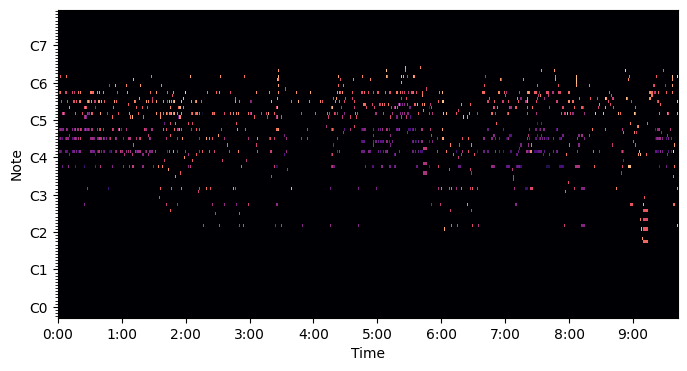

In [4]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # Use librosa's specshow function for displaying the piano roll
    librosa.display.specshow(test_midi_data.get_piano_roll(fs)[start_pitch:end_pitch],
                                hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                                fmin=pretty_midi.note_number_to_hz(start_pitch))

plt.figure(figsize=(8, 4))
plot_piano_roll(test_midi_data, 9, 108) #A0 = 9, C8 = 108 - These are the limits of a piano - but should be 88 notes so is the highest note 97?

# For full dataset extraction

### 2018 extraction is in the next section

In [20]:
csv_maestro_midi = pd.read_csv(data_path+'maestro-v3.0.0.csv')
midi_file_names = csv_maestro_midi['midi_filename']
# print(midi_file_names)

0       2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...
1       2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...
2       2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...
3       2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...
4       2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...
                              ...                        
1271    2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...
1272    2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...
1273    2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORI...
1274    2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_...
1275    2004/MIDI-Unprocessed_XP_04_R1_2004_01-02_ORIG...
Name: midi_filename, Length: 1276, dtype: object


In [5]:
idx_to_cqt = {}

In [6]:
# for idx, midi_file in enumerate(midi_file_names[1050:]):

#     midi_data = data_path + midi_file
#     print(f"Converting midi file from {midi_file.split('/')[0]}, with index {idx}, and file name {midi_file.split('/')[1]}")

#     pretty_midi_data = pretty_midi.PrettyMIDI(midi_data)
#     pretty_midi_piano_roll = pretty_midi_data.get_piano_roll()
#     idx_to_cqt[idx] = pretty_midi_piano_roll

#     with open('/home/hice1/sgoel83/scratch/midi_pickle/maestro-midi-5.pickle', 'wb+' if idx == 0 else 'ab+') as handle:
#         pickle.dump({idx: pretty_midi_piano_roll}, handle, protocol=pickle.HIGHEST_PROTOCOL)

Converting midi file from 2004, with index 0, and file name MIDI-Unprocessed_SMF_22_R1_2004_01-04_ORIG_MID--AUDIO_22_R1_2004_10_Track10_wav.midi
Converting midi file from 2018, with index 1, and file name MIDI-Unprocessed_Recital5-7_MID--AUDIO_06_R1_2018_wav--2.midi
Converting midi file from 2004, with index 2, and file name MIDI-Unprocessed_XP_21_R1_2004_02_ORIG_MID--AUDIO_21_R1_2004_02_Track02_wav.midi
Converting midi file from 2004, with index 3, and file name MIDI-Unprocessed_XP_21_R1_2004_02_ORIG_MID--AUDIO_21_R1_2004_03_Track03_wav.midi
Converting midi file from 2018, with index 4, and file name MIDI-Unprocessed_Recital5-7_MID--AUDIO_05_R1_2018_wav--1.midi
Converting midi file from 2009, with index 5, and file name MIDI-Unprocessed_17_R1_2009_01-03_ORIG_MID--AUDIO_17_R1_2009_17_R1_2009_01_WAV.midi
Converting midi file from 2009, with index 6, and file name MIDI-Unprocessed_20_R1_2009_01-05_ORIG_MID--AUDIO_20_R1_2009_20_R1_2009_01_WAV.midi
Converting midi file from 2011, with inde

In [7]:
idx_to_cqt.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [2]:
# NEEDS TO BE A SEPARATE UTILS CODE OR SOMETHING. This reads and combines the full pickle file into 1 dictionary.
import pickle
final_dict = {}
with open('/home/hice1/sgoel83/scratch/midi_pickle/midi_all.pickle', 'rb') as f:
    while True:
        try:
            data = pickle.load(f)
            # final_dict = {**final_dict, **data}
        except EOFError:
            break

In [7]:
print(data.keys())

dict_keys([1200, 1201, 1202, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275])


In [6]:
# File breaks: start, 260, 500, 760, 1050, end

In [3]:
# import pickle
# file_names = ['/home/hice1/sgoel83/scratch/midi_pickle/maestro-midi-1.pickle', '/home/hice1/sgoel83/scratch/midi_pickle/maestro-midi-2.pickle', '/home/hice1/sgoel83/scratch/midi_pickle/maestro-midi-3.pickle', '/home/hice1/sgoel83/scratch/midi_pickle/maestro-midi-4.pickle', '/home/hice1/sgoel83/scratch/midi_pickle/maestro-midi-5.pickle']

# final_dict = {}
# for fn in file_names:
#     combined_data = {}

#     if '-2' in fn:
#         offset = 260
#     elif '-3' in fn:
#         offset = 500
#     elif '-4' in fn:
#         offset = 760
#     elif '-5' in fn:
#         offset = 1050
#     else:
#         offset = 0

#     with open(fn, 'rb') as f:
#         unpickler = pickle.Unpickler(f)
        
#         while True:
#             try:
#                 item = unpickler.load()  # Load the next object in the file
#                 combined_data[list(item.keys())[0] + offset] = list(item.values())[0]
#             except EOFError:
#                 break

#     final_dict = {**final_dict, **combined_data}

# print(len(final_dict))

# chunk_size = 100  # Set a chunk size
# output_file = '/home/hice1/sgoel83/scratch/midi_pickle/midi_all.pickle'

# with open(output_file, 'wb') as f:
#     for i in range(0, len(final_dict), chunk_size):
#         try:
#             chunk = dict(list(final_dict.items())[i:i+chunk_size])
#             pickle.dump(chunk, f)
#             print(i)
#         except OSError as e:
#             print(f"Error on chunk {i / 100}: {e}")
#             break

# print("Done! :)")

: 

: 

# For 2018 extraction only

In [3]:
midi2018_file_names = []
csv_maestro_midi = pd.read_csv(data_path+'maestro-v3.0.0.csv')
for idx, midi_file_a in enumerate(csv_maestro_midi['midi_filename']):
    if midi_file_a[:4] == '2018':
        midi2018_file_names.append((idx, midi_file_a))
print(midi2018_file_names)
print(len(midi2018_file_names))

[(0, '2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R3_2018_wav--1.midi'), (18, '2018/MIDI-Unprocessed_Recital1-3_MID--AUDIO_01_R1_2018_wav--4.midi'), (19, '2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_18_R1_2018_wav--2.midi'), (21, '2018/MIDI-Unprocessed_Recital5-7_MID--AUDIO_07_R1_2018_wav--2.midi'), (22, '2018/MIDI-Unprocessed_Recital9-11_MID--AUDIO_11_R1_2018_wav--2.midi'), (23, '2018/MIDI-Unprocessed_Chamber6_MID--AUDIO_20_R3_2018_wav--2.midi'), (26, '2018/MIDI-Unprocessed_Recital12_MID--AUDIO_12_R1_2018_wav--2.midi'), (35, '2018/MIDI-Unprocessed_Recital13-15_MID--AUDIO_15_R1_2018_wav--1.midi'), (61, '2018/MIDI-Unprocessed_Recital20_MID--AUDIO_20_R1_2018_wav--3.midi'), (69, '2018/MIDI-Unprocessed_Recital1-3_MID--AUDIO_02_R1_2018_wav--4.midi'), (74, '2018/MIDI-Unprocessed_Recital16_MID--AUDIO_16_R1_2018_wav--3.midi'), (75, '2018/MIDI-Unprocessed_Recital9-11_MID--AUDIO_10_R1_2018_wav--3.midi'), (87, '2018/MIDI-Unprocessed_Recital8_MID--AUDIO_08_R1_2018_wav--2.midi'), (88, '2018/MIDI

In [4]:
idx_to_midi = {}

In [5]:
for (idx, midi_file) in midi2018_file_names:

    midi_data = data_path + midi_file
    print(f"Converting midi file from {midi_file.split('/')[0]}, with index {idx}, and file name {midi_file.split('/')[1]}")

    pretty_midi_data = pretty_midi.PrettyMIDI(midi_data)
    pretty_midi_piano_roll = pretty_midi_data.get_piano_roll()
    idx_to_midi[idx] = pretty_midi_piano_roll

    with open('/home/hice1/sgoel83/scratch/midi_pickle/midi2018.pickle', 'wb+' if idx == 0 else 'ab+') as handle:
        pickle.dump({idx: pretty_midi_piano_roll}, handle, protocol=pickle.HIGHEST_PROTOCOL)

Converting midi file from 2018, with index 0, and file name MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R3_2018_wav--1.midi
Converting midi file from 2018, with index 18, and file name MIDI-Unprocessed_Recital1-3_MID--AUDIO_01_R1_2018_wav--4.midi
Converting midi file from 2018, with index 19, and file name MIDI-Unprocessed_Recital17-19_MID--AUDIO_18_R1_2018_wav--2.midi
Converting midi file from 2018, with index 21, and file name MIDI-Unprocessed_Recital5-7_MID--AUDIO_07_R1_2018_wav--2.midi
Converting midi file from 2018, with index 22, and file name MIDI-Unprocessed_Recital9-11_MID--AUDIO_11_R1_2018_wav--2.midi
Converting midi file from 2018, with index 23, and file name MIDI-Unprocessed_Chamber6_MID--AUDIO_20_R3_2018_wav--2.midi
Converting midi file from 2018, with index 26, and file name MIDI-Unprocessed_Recital12_MID--AUDIO_12_R1_2018_wav--2.midi
Converting midi file from 2018, with index 35, and file name MIDI-Unprocessed_Recital13-15_MID--AUDIO_15_R1_2018_wav--1.midi
Converting midi f

In [7]:
print(idx_to_midi.keys())
print(len(idx_to_midi.keys()))

dict_keys([0, 18, 19, 21, 22, 23, 26, 35, 61, 69, 74, 75, 87, 88, 89, 97, 110, 112, 114, 187, 223, 234, 255, 257, 280, 317, 347, 377, 392, 393, 413, 414, 443, 444, 445, 446, 453, 454, 455, 456, 476, 479, 672, 678, 679, 691, 711, 717, 724, 729, 778, 782, 852, 873, 888, 920, 931, 934, 936, 939, 945, 972, 1003, 1009, 1014, 1015, 1017, 1022, 1031, 1051, 1054, 1094, 1095, 1106, 1109, 1110, 1138, 1141, 1142, 1144, 1159, 1165, 1166, 1181, 1194, 1199, 1200, 1216, 1224, 1240, 1253, 1255, 1274])
93


In [1]:
# # pip install this
# import gdown

# url = "https://drive.google.com/file/d/14G5c5tvwTjlcXE6Bk1LlIjzMtBp8fkPf"
# output = "<path/to/file/file-name>.pickle"
# gdown.download(url, output)

In [4]:
# NEEDS TO BE A SEPARATE UTILS CODE OR SOMETHING. This reads and combines the full pickle file into 1 dictionary.
import pickle
final_dict = {}
with open('/home/hice1/sgoel83/scratch/midi_pickle/midi2018.pickle', 'rb') as f:
    while True:
        try:
            data = pickle.load(f)
            final_dict = {**final_dict, **data}
        except EOFError:
            break

In [5]:
print(len(final_dict.keys()))
print(final_dict.keys())

93
dict_keys([0, 18, 19, 21, 22, 23, 26, 35, 61, 69, 74, 75, 87, 88, 89, 97, 110, 112, 114, 187, 223, 234, 255, 257, 280, 317, 347, 377, 392, 393, 413, 414, 443, 444, 445, 446, 453, 454, 455, 456, 476, 479, 672, 678, 679, 691, 711, 717, 724, 729, 778, 782, 852, 873, 888, 920, 931, 934, 936, 939, 945, 972, 1003, 1009, 1014, 1015, 1017, 1022, 1031, 1051, 1054, 1094, 1095, 1106, 1109, 1110, 1138, 1141, 1142, 1144, 1159, 1165, 1166, 1181, 1194, 1199, 1200, 1216, 1224, 1240, 1253, 1255, 1274])
